# Projekt - odovzdanie 1
 
 **Autori:** Patrik Villant, Ivan Vykopal
 
 ## Dataset pre personal_train
 
 Dataset obsahuje meno pacienta, adresu, vek, pohlavie a dátum narodenia.

In [1]:
# import potrebných knižníc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import math

In [2]:
personal = pd.read_csv('personal_train.csv')

In [3]:
personal.head(10)

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",-4700,Female,1972-03-14 00 00 00
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",52,Male,1967-02-10 00:00:00
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",46,Female,1972/12/15
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",43,Male,1976-03-16
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",68,Male,1951-05-04
5,5,Ronald Lange,"30973 Martinez Shores\r\nJameston, CA 70245",58,Male,1960-11-24
6,6,Boyd Eiselein,29941 Christopher Curve Apt. 682\r\nRaychester...,47,Female,1972-01-05
7,7,Raymond Smith,53487 Scott Extensions Apt. 824\r\nMccartytown...,52,Male,1967-10-05
8,8,Harold Miller,"8514 Elizabeth Crescent\r\nWest Joseland, GA 4...",44,Male,1975-07-04
9,9,Charles Czachorowski,"6798 Wagner Locks Suite 377\r\nLake Brenda, DC...",70,Female,1949-03-24


Výpis prvých 10 záznamov z datasetu personal_train.csv

In [4]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3933 non-null   int64 
 1   name           3933 non-null   object
 2   address        3933 non-null   object
 3   age            3933 non-null   int64 
 4   sex            3933 non-null   object
 5   date_of_birth  3933 non-null   object
dtypes: int64(2), object(4)
memory usage: 184.5+ KB


V datasete máme 3933 záznamov a 6 atribútov. 2x - integer, 4x - string, pričom jeden z nich je dátum, ktorý by mohol mať iný formát.

In [5]:
personal.shape[0] - personal.dropna().shape[0]

0

V datasete nemáme nulové hodnoty

In [6]:
# odstránenie stĺpca s indexom
personal = personal.drop(columns=['Unnamed: 0'])

In [7]:
personal.describe(include='all')

,name,address,age,sex,date_of_birth
count,3933,3933,3933.000000,3933,3933
unique,3933,3933,NaN,2,3703
top,Robert Sullivan,"0209 Theresa Mall\r\nEast Christineburgh, HI 7...",NaN,Male,1965-02-03
freq,1,1,NaN,2621,3
mean,NaN,NaN,84.559369,NaN,NaN
std,NaN,NaN,1713.232486,NaN,NaN
min,NaN,NaN,-8400.000000,NaN,NaN
25%,NaN,NaN,43.000000,NaN,NaN
50%,NaN,NaN,52.000000,NaN,NaN
75%,NaN,NaN,61.000000,NaN,NaN


V datasete vypíšeme deskriptívne štatistiky atribútov.

Zo štatistiky je možné vidieť, že nemáme žiadne duplicitné hodnoty. Ďalej sme zistili, že prevládajú v datasete muži a že traja pacienti sa narodili v rovnaký deň.

#### Atribút age

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

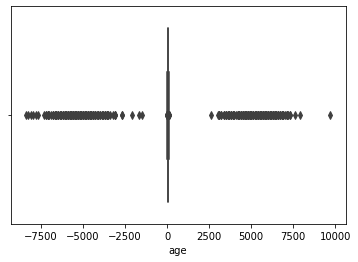

In [8]:
sns.boxplot(personal.age)

Viacero hodnôt age je nereálnych (záporné hodnoty, hodnoty nad 150 rokov)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

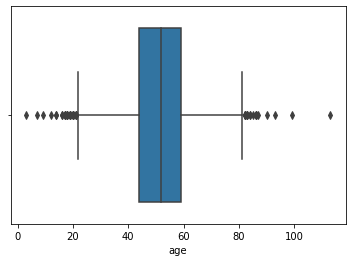

In [9]:
test = personal[ (personal.age >= 0) & (personal.age < 150)]
sns.boxplot(test.age)

Vyfiltrovali sme reálne hodnoty (od 0 po 150) a vytvorili boxplot hodnôt, pričom boli zobrazení len tí pacienti, ktorí spĺňajú podmienku, že ich vek je medzi 0 a 150.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

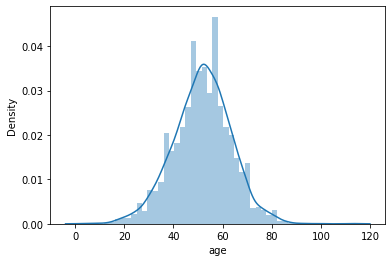

In [10]:
sns.distplot(test.age, bins=50)

Vytvorili sme si histogram z hodnôt veku, z ktorého vyčítame, že najviac ľudí má niečo málo ako 60 rokov.

#### Atribút sex

<AxesSubplot:>

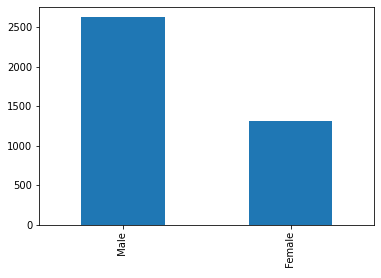

In [11]:
personal.sex.value_counts().plot.bar()

V datasete prevláda mužské pohlavie.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


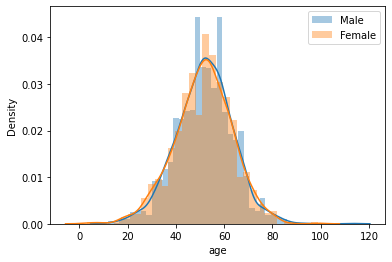

In [12]:
sns.distplot(pd.to_numeric(test[test.sex.str.strip() == 'Male'].age, errors="coerce").astype(int),label="Male")
sns.distplot(pd.to_numeric(test[test.sex.str.strip() == 'Female'].age, errors="coerce").astype(int),label="Female")
plt.legend()
plt.show()

Pri zobrazení len pacientov, ktorí majú správny vek (od 0 do 150) vidíme, že distribúcia medzi mužmi a ženami na základe veku je veľmi podobná.

Atribút date_of_birth má zlý formát (čo sme zistili pri výpise pár záznamov), bude potrebná určiť rovnaké formátovanie pre tento atribút.

In [13]:
personal[personal.name.duplicated()]

,name,address,age,sex,date_of_birth


Zistili sme, že v datasete personal_train nie sú žiadne duplicitné hodnoty.

Atribút age a atribút date_of_birth závisa od seba. S tým, že nesprávny vek pri pacientoch vieme upraviť na základe atribútu date_of_birth, avšak až keď date_of_birth bude mať upravený formát.  

### Identifikácia problémov: 
- v datasete je problém s formátom pri date_of_birth
- v datasete je problém s vekom, kde vek nadobúda nereálne hodnoty a veľa výchyliek
- adresy obsahujú biele znaky (\r\n), čo však nemusí zohrávať veľkú úlohu

### Riešenie problémov:
- pri atribúte age, vieme vek dopočítať na základe date_of_birth (avšak pri nahliadnutí na záznamy, vek je určený na základe roku 2019)
- pri atribúte date_of_birth riešením je zjednotenie formátu dátumu

 ## Dataset pre other_train

In [14]:
other = pd.read_csv('other_train.csv')
other.head(10)

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Nelson Dupas,USS Wagner\r\nFPO AP 75518,White,Married-civ-spouse,Exec-managerial,f,10.0,Husband,0.0,Some-college,32916.0,0.0,<=50K,"{'mean_glucose':'129.6171875','std_glucose':'4...",United-States,45.0,0.0,Private
1,1,Jeremy Helfrich,"0611 Jones Cliffs\r\nPort Kevin, AR 87203",White,Married-civ-spouse,Prof-specialty,f,15.0,Husband,15024.0,Prof-school,323798.0,0.0,>50K,"{'mean_glucose':'100.546875','std_glucose':'39...",United-States,55.0,0.0,Private
2,2,Luis Burdick,116 Wallace Meadow Suite 259\r\nPort Jenniferb...,White,Married-civ-spouse,Exec-managerial,f,9.0,Husband,0.0,HS-grad,116927.0,1.0,>50K,"{'mean_glucose':'26.09375','std_glucose':'nan'...",United-States,42.0,0.0,Self-emp-inc
3,3,Marion Bursey,"85508 Martin Villages\r\nJonathanshire, AL 29047",White,Married-civ-spouse,Sales,f,10.0,Husband,0.0,Some-college,206351.0,0.0,<=50K,"{'mean_glucose':'113.0625','std_glucose':'42.8...",United-States,40.0,0.0,Private
4,4,Allen Brickley,58775 Thomas Mills Apt. 873\r\nLake Richardhav...,White,Married-civ-spouse,Craft-repair,f,13.0,Husband,0.0,Bachelors,37939.0,0.0,<=50K,"{'mean_glucose':'131.1328125','std_glucose':'4...",United-States,35.0,0.0,Self-emp-not-inc
5,5,Charles Wing,"752 Jeffrey Mountains\r\nWest Amyfurt, WA 37220",White,Separated,Other-service,f,9.0,Not-in-family,0.0,HS-grad,205934.0,1.0,<=50K,"{'mean_glucose':'68.171875','std_glucose':'39....",United-States,25.0,0.0,Private
6,6,Hector Laverdiere,"386 James Port\r\nJordanville, NH 35244",White,Married-civ-spouse,Transport-moving,f,10.0,Husband,0.0,Some-college,33304.0,1.0,>50K,"{'mean_glucose':'57.984375','std_glucose':'34....",United-States,40.0,0.0,Private
7,7,Jackson Jimenez,"8161 Hopkins Locks\r\nTaylorhaven, CA 01893",Black,Married-civ-spouse,Craft-repair,f,9.0,Husband,4386.0,HS-grad,160808.0,1.0,<=50K,"{'mean_glucose':'39.84375','std_glucose':'34.3...",United-States,48.0,0.0,Private
8,8,Charles Langley,"3036 Bailey Loaf Suite 670\r\nSmithhaven, IL 0...",Black,Never-married,Other-service,F,4.0,Unmarried,0.0,7th-8th,202822.0,0.0,<=50K,"{'mean_glucose':'120.6640625','std_glucose':'4...",Trinadad&Tobago,14.0,0.0,Private
9,9,David Burt,91514 Kevin Extension Suite 992\r\nObrienhaven...,White,Married-civ-spouse,Machine-op-inspct,FALSE,9.0,Husband,0.0,HS-grad,144608.0,0.0,<=50K,"{'mean_glucose':'119.7890625','std_glucose':'4...",United-States,40.0,0.0,Private


Výpis prvých 10 riadkov datasetu other_train.csv

In [15]:
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3983 non-null   int64  
 1   name            3983 non-null   object 
 2   address         3983 non-null   object 
 3   race            3967 non-null   object 
 4   marital-status  3710 non-null   object 
 5   occupation      3965 non-null   object 
 6   pregnant        3967 non-null   object 
 7   education-num   3965 non-null   float64
 8   relationship    3964 non-null   object 
 9   capital-gain    3963 non-null   float64
 10  education       3967 non-null   object 
 11  fnlwgt          3969 non-null   float64
 12  class           3968 non-null   float64
 13  income          3966 non-null   object 
 14  medical_info    3968 non-null   object 
 15  native-country  3967 non-null   object 
 16  hours-per-week  3965 non-null   float64
 17  capital-loss    3960 non-null   f

V datasete sa nachadzaju kategorické, reťazcové a číslené atribúty, pričom atribút medical_info obsahje v sebe json formát.

In [16]:
other.shape

(3983, 19)

V datasete môžeme nájsť 3983 riadkov a 19 atribútov s tým, že atribút medical_info je tvorený viacerými atribútmi a prvý atribút predstavuje index záznamu.

In [17]:
other = other.drop(columns=['Unnamed: 0'])

Vymazanie nežiadúceho atribútu - číslovanie

In [18]:
other.shape[0] - other.dropna().shape[0]

334

Počet záznamov s nulovými hodnotami je 334.

In [19]:
other.isnull().sum()

name                0
address             0
race               16
marital-status    273
occupation         18
pregnant           16
education-num      18
relationship       19
capital-gain       20
education          16
fnlwgt             14
class              15
income             17
medical_info       15
native-country     16
hours-per-week     18
capital-loss       23
workclass          16
dtype: int64

Výpis počtu prázdnych hodnôt pre jednotlivé atribúty.

In [20]:
other.isnull().sum().sum()

530

Celkovo je v datasete 530 chýbajúcich hodnôt, avšak, je to bez rozdelenia atribútu medical_info.

In [21]:
columns = eval(other.medical_info[0])
len(columns)

8

Atribút medical_info v sebe obsahuje ďalších 8 atribútov.

In [22]:
for i in range(len(other)):
    data = other.medical_info[i]
    if str(data) == 'nan':
        j ={'mean_glucose': np.nan,
             'std_glucose': np.nan,
             'kurtosis_glucose': np.nan,
             'skewness_glucose': np.nan,
             'mean_oxygen': np.nan,
             'std_oxygen': np.nan,
             'kurtosis_oxygen': np.nan,
             'skewness_oxygen': np.nan}
    else:
        j = eval(str(data))
    other.at[i,'mean_glucose'] = float(j['mean_glucose'])
    other.at[i,'std_glucose'] = float(j['std_glucose'])
    other.at[i,'kurtosis_glucose'] = float(j['kurtosis_glucose'])
    other.at[i,'skewness_glucose'] = float(j['skewness_glucose'])
    other.at[i,'mean_oxygen'] = float(j['mean_oxygen'])
    other.at[i,'std_oxygen'] = float(j['std_oxygen'])
    other.at[i,'kurtosis_oxygen'] = float(j['kurtosis_oxygen'])
    other.at[i,'skewness_oxygen'] = float(j['skewness_oxygen'])

In [23]:
other = other.drop(columns=['medical_info'])

Aby sme vedeli pracovať so všetkými atribútmi je potrebné rozdelenie atribútu "medical_info" na jednotlivé atribúty a zmazanie pôvodného atribútu "medical_info".

In [24]:
other.head()

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Nelson Dupas,USS Wagner\r\nFPO AP 75518,White,Married-civ-spouse,Exec-managerial,f,10.0,Husband,0.0,Some-college,...,0.0,Private,129.617188,47.774392,0.114308,0.066342,2.135452,14.168363,10.458148,139.089149
1,Jeremy Helfrich,"0611 Jones Cliffs\r\nPort Kevin, AR 87203",White,Married-civ-spouse,Prof-specialty,f,15.0,Husband,15024.0,Prof-school,...,0.0,Private,100.546875,39.419193,0.519220,0.793882,3.300167,20.301145,7.566061,63.827315
2,Luis Burdick,116 Wallace Meadow Suite 259\r\nPort Jenniferb...,White,Married-civ-spouse,Exec-managerial,f,9.0,Husband,0.0,HS-grad,...,0.0,Self-emp-inc,26.093750,NaN,5.067584,28.013690,26.015050,52.619602,2.345710,5.245282
3,Marion Bursey,"85508 Martin Villages\r\nJonathanshire, AL 29047",White,Married-civ-spouse,Sales,f,10.0,Husband,0.0,Some-college,...,0.0,Private,113.062500,42.812226,0.231768,0.540982,1.731605,11.762521,11.964837,203.090244
4,Allen Brickley,58775 Thomas Mills Apt. 873\r\nLake Richardhav...,White,Married-civ-spouse,Craft-repair,f,13.0,Husband,0.0,Bachelors,...,0.0,Self-emp-not-inc,131.132812,46.648682,0.334587,0.566602,2.887124,21.377515,8.207284,71.573546


Výpis prvých piatich záznamov už upraveného datasetu.

In [25]:
other.isnull().sum()

name                  0
address               0
race                 16
marital-status      273
occupation           18
pregnant             16
education-num        18
relationship         19
capital-gain         20
education            16
fnlwgt               14
class                15
income               17
native-country       16
hours-per-week       18
capital-loss         23
workclass            16
mean_glucose         15
std_glucose         414
kurtosis_glucose     15
skewness_glucose     15
mean_oxygen          15
std_oxygen           15
kurtosis_oxygen      15
skewness_oxygen      15
dtype: int64

In [26]:
other.isnull().sum().sum()

1034

Výpis počtu prázdnych hodnot v jednotlivych atribútoch a celkovy súčet je 1034.

In [27]:
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3967 non-null   object 
 3   marital-status    3710 non-null   object 
 4   occupation        3965 non-null   object 
 5   pregnant          3967 non-null   object 
 6   education-num     3965 non-null   float64
 7   relationship      3964 non-null   object 
 8   capital-gain      3963 non-null   float64
 9   education         3967 non-null   object 
 10  fnlwgt            3969 non-null   float64
 11  class             3968 non-null   float64
 12  income            3966 non-null   object 
 13  native-country    3967 non-null   object 
 14  hours-per-week    3965 non-null   float64
 15  capital-loss      3960 non-null   float64
 16  workclass         3967 non-null   object 


Dataset má 2 typy premennych - float, object, pričom sú to kategorické, číselné a reťažcové atribúty.

In [28]:
other.shape

(3983, 25)

Novo-vytvorený dataset má 3983 riadkov a 25 atribútov.

In [29]:
other.describe()

,education-num,capital-gain,fnlwgt,class,hours-per-week,capital-loss,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
count,3965.000000,3963.000000,3969.000000,3968.000000,3965.000000,3960.000000,3968.000000,3569.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000
mean,10.115763,1069.521827,189374.662383,0.256552,40.406305,76.721212,101.216507,45.149233,0.954596,4.241261,18.467885,31.172996,7.410578,91.257886
std,2.568333,7353.525505,105318.658007,0.436785,12.375377,387.449247,33.590085,7.595777,1.613398,9.696736,34.747837,22.294108,4.809258,108.411705
min,1.000000,0.000000,19410.000000,0.000000,2.000000,0.000000,6.187500,25.695250,-1.641515,-1.755332,0.213211,7.370432,-2.597872,-1.976976
25%,9.000000,0.000000,120067.000000,0.000000,40.000000,0.000000,87.544922,40.165726,0.072000,-0.120593,2.063127,15.029585,3.631263,12.830509
50%,10.000000,0.000000,179973.000000,0.000000,40.000000,0.000000,110.644531,45.835260,0.311577,0.379008,3.229933,20.551260,7.783017,68.505049
75%,12.000000,0.000000,232855.000000,1.000000,45.000000,0.000000,124.160156,50.264680,0.788435,2.107509,12.652383,43.255617,10.269058,127.017151
max,16.000000,99999.000000,889965.000000,1.000000,99.000000,4356.000000,189.734375,91.206475,8.069522,68.101622,217.371238,110.642211,34.539844,1191.000837


Výpis deskriptivnych štatistík číselných atribútov.

Na základe tejto štatistiky vieme určiť priemerné hodnoty, štandardné odchýlky, kvartily, minimálne a maximálne hodnoty pre číselné atribúty.

In [30]:
other.describe(include=[object])

,name,address,race,marital-status,occupation,pregnant,relationship,education,income,native-country,workclass
count,3983,3983,3967,3710,3965,3967,3964,3967,3966,3967,3967
unique,3933,3933,5,8,15,6,9,16,2,39,15
top,Nick Fried,Unit 9169 Box 4422\r\nDPO AP 27992,White,Married-civ-spouse,Prof-specialty,f,Husband,HS-grad,<=50K,United-States,Private
freq,3,3,3394,1620,528,3500,1590,1279,3002,3559,2496


Výpis deskriptívnych štatistík atribútov, ktoré nie sú číselné.

Na základe tejto štatistiky vieme určiť počet unikátnych hodnôt, najčastejšiu hodnotu a jej frekvenciu. Na základe tejto tabuľky vidíme, že podľa mena máme v datasete 50 duplikátov, najčastejšou rasou je White. Ďalej vidíme, že pregnant obsahuje 6 unikátnych hodnôt, avšak podľa správnosti by mala obsahovať len 2.

In [31]:
len(other[other.name.duplicated()])

50

Počet duplikátov podľa mena je 50, tak ako sme zistili predtým.

### Významné atribúty

#### Atribút race
Atribút, ktorý predstavuje rasu pacienta. Je to kategorický atribút.

<AxesSubplot:>

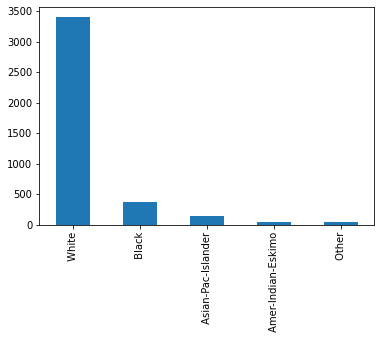

In [32]:
other.race.value_counts().plot.bar()

In [33]:
other.race.isnull().sum()

16

Analyzovanie rás v danom datasete, prevláda biela rasa a máme 16 prázdnych hodnôt

#### Atribút pregnant
Atribút vyjadrujúci, či pacient je alebo nie je tehotný.

In [34]:
other.pregnant.unique()

array(['f', 'F', 'FALSE', 't', nan, 'TRUE', 'T'], dtype=object)

In [35]:
def unify(p):
    if p in ['f','F','FALSE']:
        return False
    if p in ['t','T','TRUE']:
        return True
    else:
        return np.nan

other.pregnant = other.pregnant.apply(unify)

<AxesSubplot:>

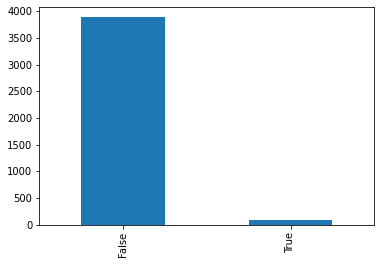

In [36]:
other.pregnant.value_counts().plot.bar()

In [37]:
other.pregnant.isnull().sum()

16

Keďže v atribúte pregnant sa vyskytovali viaceré hodnoty, ktorých výpovedna hodnota bola rovnaká, no bola inak napísaná, zmenili sme ich na jednotné, vyskytoval sa už iba True, False alebo NaN a zistili sme, že je menej tehotných exemplárov a 16 hodnôt je chýbajúcich.

#### Atribút fnlwgt
Číselný atribút.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

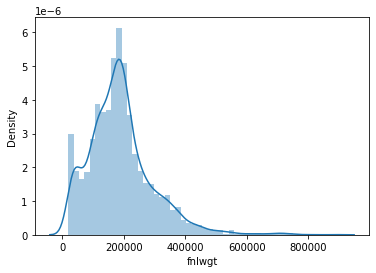

In [38]:
sns.distplot(other['fnlwgt'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

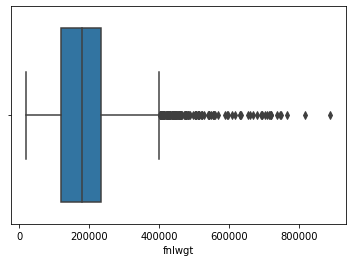

In [39]:
sns.boxplot(other['fnlwgt'])

In [40]:
other.fnlwgt.isnull().sum()

14

In [41]:
print('Koeficient asymetrie je %.3f' % other['fnlwgt'].skew())
print('Koeficient špicatosti je %.3f' % other['fnlwgt'].kurtosis())

Koeficient asymetrie je 1.291
Koeficient špicatosti je 3.588


Vykreslenie grafu z atribútu fnlwgt a vypísanie počtu prázdnych hodnôt: 14.
Zároveň z boxplotu vidíme, že má veľa vychýlených hodnôt, ktoré sa nachádzajú nad hodnotou 400000.

Na základe vypočítaného koeficientu asymetrie vieme povedať, že dáta sú naklonené viac doľava (positive skew), keďže jeho hodnota je väčšia ako 1.
Na základe hodnoty špicatosti sa dáta pohybujú okolo normálneho rozdelenia, pre ktoré je koeficient špicatosti 3.

#### Atribút class

Ide o kategorický atribút, ktorý určuje či je pacient chorý (1.0) alebo zdravý (0.0).

<AxesSubplot:>

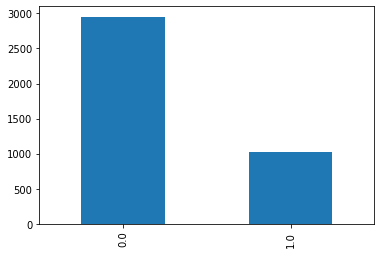

In [42]:
other['class'].value_counts().plot.bar()

In [43]:
other['class'].isnull().sum()

15

In [44]:
print('Koeficient asymetrie je %.3f' % other['class'].skew())
print('Koeficient špicatosti je %.3f' % other['class'].kurtosis())

Koeficient asymetrie je 1.115
Koeficient špicatosti je -0.757


Z grafu vieme vyčítať, že viacej ľudí je zdravých ako chorých, no aj tento atribút má 15 prázdnych hodnôt.

Na základe vypočítaného koeficientu asymetrie vieme povedať, že dáta sú naklonené viac doľava (positive skew), keďže hodnota skewness je väčšia ako 1. 
Na základe hodnoty špicatosti sa nachádza veľmi málo dát na okrajoch, keďže hodnota koeficientu špicatosti je menej ako 3.

#### Atribút hours-per-week
Číselný atribút, ktorý vyjadruje počet pracovných hodín počas týždňa.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

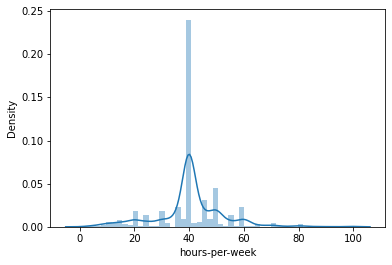

In [45]:
sns.distplot(other['hours-per-week'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

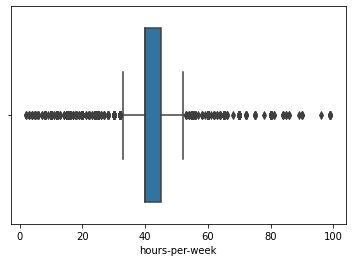

In [46]:
sns.boxplot(other['hours-per-week'])

In [47]:
other['hours-per-week'].isnull().sum()

18

In [48]:
print('Koeficient asymetrie je %.3f' % other['hours-per-week'].skew())
print('Koeficient špicatosti je %.3f' % other['hours-per-week'].kurtosis())

Koeficient asymetrie je 0.193
Koeficient špicatosti je 2.684


Z grafov sme zistili, že ľudia najčastejšie pracujú v priemere okolo 40 hodín týždenne, pričom na základe deskriptívnej štatistiky priemerná pracovná doba pacientov je 40,41 hodiny za víkend. Daný atribú obsahuje aj 18 chýbajúcich hodnôt a veľa vychýlených hodnôt na základe boxplotu.

Na základe vypočítaného koeficientu asymetrie vieme povedať, že dáta sú skoro symetrické, keďže hodnota sa pohybuje blízko k 0. Na základe hodnoty špicatosti sa dáta pohybujú okolo normálneho rozdelenia, keďže hodnota je blízka k 3.

#### Atribút mean_glucose
Číselný atribút predstavujúci priemernú hodnotu glukózy pre pacienta počas celého merania.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_glucose', ylabel='Density'>

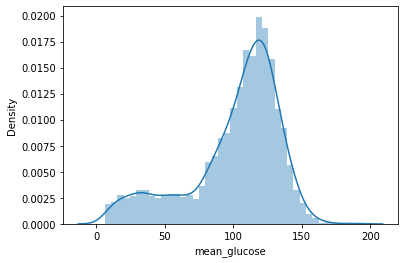

In [49]:
sns.distplot(other['mean_glucose'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_glucose'>

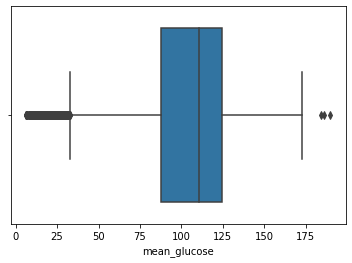

In [50]:
sns.boxplot(other['mean_glucose'])

In [51]:
other['mean_glucose'].isnull().sum()

15

In [52]:
print('Koeficient asymetrie je %.3f' % other['mean_glucose'].skew())
print('Koeficient špicatosti je %.3f' % other['mean_glucose'].kurtosis())

Koeficient asymetrie je -1.038
Koeficient špicatosti je 0.428


Na základe deskriptívnej štatistiky sme zistili, že priemerný mean_glucose je okolo 101. Zároveň atribút obsahuje 15 chýbajúcich hodnôt a aj vychýlené hodnoty.

Na základe vypočítaného koeficientu asymetrie vieme povedať, že dáta sú naklonené viac doprava (negative skew), keďže jeho hodnota je menšia ako -1.
Na základe hodnoty špicatosti sa nachádza veľmi málo dát na okrajoch, keďže hodnota koeficientu špicatosti je menej ako 3.

#### Atribút std_glucose
Číselný atribút reprezentujúci štandardnú odchýlku glukózy počas celého merania pre pacienta.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='std_glucose', ylabel='Density'>

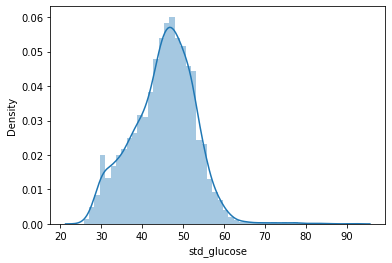

In [53]:
sns.distplot(other['std_glucose'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='std_glucose'>

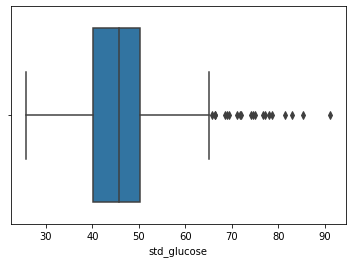

In [54]:
sns.boxplot(other['std_glucose'])

In [55]:
other['std_glucose'].isnull().sum()

414

In [56]:
print('Koeficient asymetrie je %.3f' % other['std_glucose'].skew())
print('Koeficient špicatosti je %.3f' % other['std_glucose'].kurtosis())

Koeficient asymetrie je 0.061
Koeficient špicatosti je 0.941


Na základe deskriptívnej štatistiky sme zistili, že priemerný std_glucose je okolo 45. Zároveň atribút obsahuje 414 chýbajúcich hodnôt a aj vychýlené hodnoty, ktoré sa nachádzahjú nad hodnotou cez 60.

Na základe vypočítaného koeficientu asymetrie vieme povedať, že dáta sú skoro symetrické tým, že skewness sa pohybuje okolo 0.
Na základe hodnoty špicatosti sa nachádza veľmi málo dát na okrajoch, keďže hodnota koeficientu špicatosti je menej ako 3.

#### Atribút kurotis_glucose
Číselný atribút reprezentujúci špicatosť glukózy pre pacienta.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_glucose', ylabel='Density'>

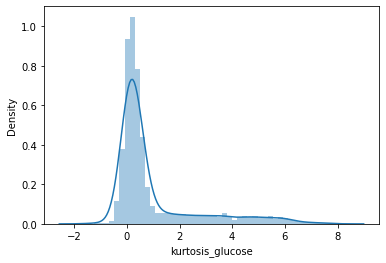

In [57]:
sns.distplot(other['kurtosis_glucose'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kurtosis_glucose'>

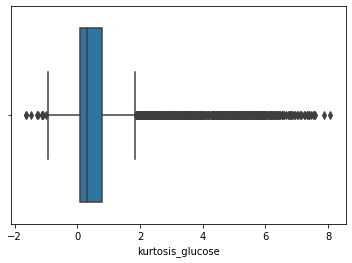

In [58]:
sns.boxplot(other['kurtosis_glucose'])

In [59]:
other['kurtosis_glucose'].isnull().sum()

15

In [60]:
print('Koeficient asymetrie je %.3f' % other['kurtosis_glucose'].skew())
print('Koeficient špicatosti je %.3f' % other['kurtosis_glucose'].kurtosis())

Koeficient asymetrie je 2.030
Koeficient špicatosti je 3.282


Na základe deskriptívnej štatistiky sme zistili, že priemerný kurtosis_glucose je 0.95. Zároveň atribút obsahuje 15 chýbajúcich hodnôt a aj množstvo vychýlených hodnôt.

Na základe vypočítaného koeficientu asymetrie vieme povedať, že dáta sú naklonené veľmi doľava (positive skew), keďže jeho hodnota je väčšia ako 1.
Na základe hodnoty špicatosti sú dáta podobné normálnemu rozdelenie, pre ktoré je hodnota špicatosti 3.

#### Atribút skewness_glucose
Číselný atribút predstavujúci koeficient asymetrie glukózy u pacienta počas celého merania.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skewness_glucose', ylabel='Density'>

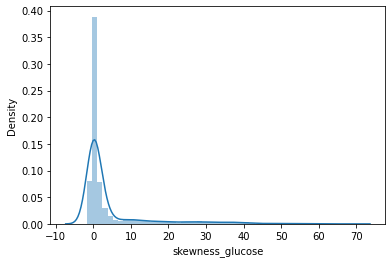

In [61]:
sns.distplot(other['skewness_glucose'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skewness_glucose'>

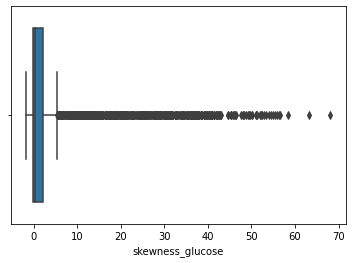

In [62]:
sns.boxplot(other['skewness_glucose'])

In [63]:
other['skewness_glucose'].isnull().sum()

15

In [64]:
print('Koeficient asymetrie je %.3f' % other['skewness_glucose'].skew())
print('Koeficient špicatosti je %.3f' % other['skewness_glucose'].kurtosis())

Koeficient asymetrie je 2.860
Koeficient špicatosti je 8.134


Na základe deskriptívnej štatistiky sme zistili, že priemerný skewness_glucose je 4.24. Väčšina hodnôt sa pohybuje od 0 po 5 Zároveň atribút obsahuje 15 chýbajúcich hodnôt a aj veľké množstvo vychýlených hodnôt.

Na základe vypočítaného koeficientu asymetrie vieme povedať, že dáta sú naklonené veľmi doľava (positive skew), keďže jeho hodnota je väčšia ako 1.
Na základe hodnoty špicatosti sa nachádzajú dáta viac na okrajoch, keďže hodnota koeficientu špicatosti je viac ako 3.

#### Atribút mean_oyxgen
Číselný atribút predstavujúci priemernú hodnotu kyslíka u pacienta počas celého merania.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_oxygen', ylabel='Density'>

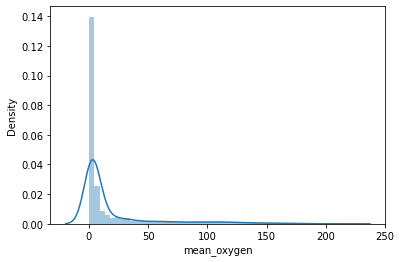

In [65]:
sns.distplot(other['mean_oxygen'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_oxygen'>

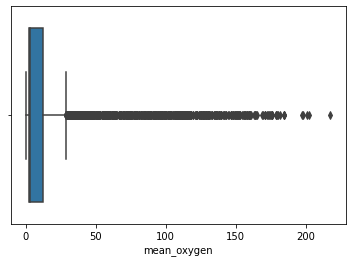

In [66]:
sns.boxplot(other['mean_oxygen'])

In [67]:
other['mean_oxygen'].isnull().sum()

15

In [68]:
print('Koeficient asymetrie je %.3f' % other['mean_oxygen'].skew())
print('Koeficient špicatosti je %.3f' % other['mean_oxygen'].kurtosis())

Koeficient asymetrie je 2.625
Koeficient špicatosti je 6.540


Podľa deskriptívnej štatistiky je priemerná hodnota mean_oxygen 18.47. V atribúte sa nachádza množstvo outlierov (vychýlených hodnôt) a obsahuje aj 15 chýbajúcich hodnôt. Väčšina hodnôt sa pohybuje v rozmedzí 0 až 12 (čo predtavuje horný kvartil).

Na základe vypočítaného koeficientu asymetrie vieme povedať, že dáta sú naklonené veľmi doľava (positive skew), keďže jeho hodnota je väčšia ako 1.
Na základe hodnoty špicatosti sa nachádza viac dát na okrajoch, keďže hodnota koeficientu špicatosti je viac ako 3.

#### Atribút std_oxygen
Číselný atribút predstavujúci štandardnú odchýlku nameraného kyslíka u pacienta.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='std_oxygen', ylabel='Density'>

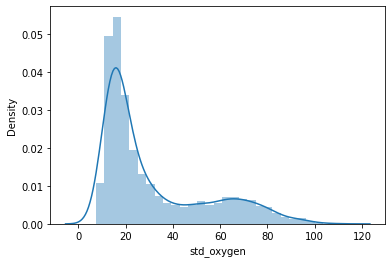

In [69]:
sns.distplot(other['std_oxygen'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='std_oxygen'>

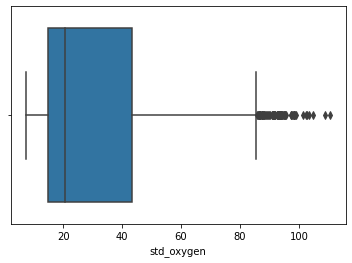

In [70]:
sns.boxplot(other['std_oxygen'])

In [71]:
other['std_oxygen'].isnull().sum()

15

In [72]:
print('Koeficient asymetrie je %.3f' % other['std_oxygen'].skew())
print('Koeficient špicatosti je %.3f' % other['std_oxygen'].kurtosis())

Koeficient asymetrie je 1.201
Koeficient špicatosti je 0.226


Priemerná hdonota je 31.17. Obsahuje aj vychýlené hodnoty a počet chýbajúcich hodnôt je 15.

Na základe vypočítaného koeficientu asymetrie vieme povedať, že dáta sú naklonené viac doľava (positive skew), keďže jeho hodnota je väčšia ako 1.
Na základe hodnoty špicatosti sa nachádza veľmi málo dát na okrajoch, keďže hodnota koeficientu špicatosti je menej ako 3.

#### Atribút kurtosis_oxygen
Číselný atribút predstavujúci koeficient špicatosti kyslíka u pacienta.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_oxygen', ylabel='Density'>

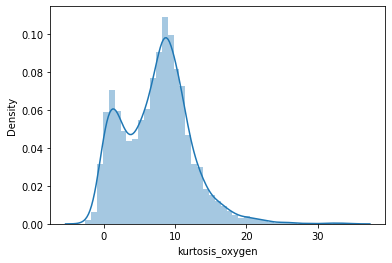

In [73]:
sns.distplot(other['kurtosis_oxygen'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kurtosis_oxygen'>

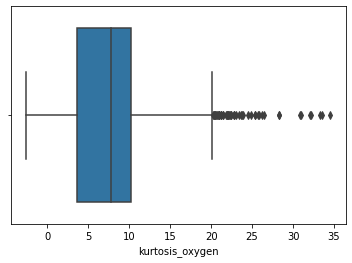

In [74]:
sns.boxplot(other['kurtosis_oxygen'])

In [75]:
other['kurtosis_oxygen'].isnull().sum()

15

In [76]:
print('Koeficient asymetrie je %.3f' % other['kurtosis_oxygen'].skew())
print('Koeficient špicatosti je %.3f' % other['kurtosis_oxygen'].kurtosis())

Koeficient asymetrie je 0.598
Koeficient špicatosti je 1.398


Obsahuje vychýlené hodnoty, počet chýbajúcich hodnôt je 15. Priemerná hodnota kurtosis_oxygen je 7.41. Pričom z grafu je vidieť, že najväčšia čast z distibúcie je medzi 4 až 10.

Na základe vypočítaného koeficientu asymetrie vieme povedať, že dáta sú naklonené mierne doľava (positive skew), keďže jeho hodnota je väčšia ako 0,5.
Na základe hodnoty špicatosti sa nachádza veľmi málo dát na okrajoch, keďže hodnota koeficientu špicatosti je menej ako 3.

#### Atribút skewness_oxygen
Číselný atribút predstavujúci koeficient asymetrie kyslíka u pacienta počas celého merania.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skewness_oxygen', ylabel='Density'>

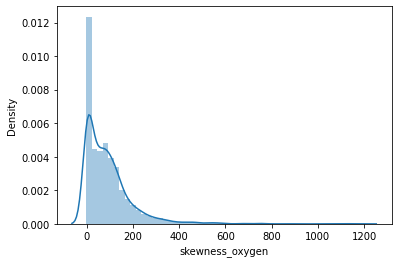

In [77]:
sns.distplot(other['skewness_oxygen'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skewness_oxygen'>

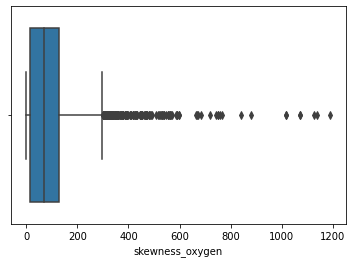

In [78]:
sns.boxplot(other['skewness_oxygen'])

In [79]:
other['skewness_oxygen'].isnull().sum()

15

In [80]:
print('Koeficient asymetrie je %.3f' % other['skewness_oxygen'].skew())
print('Koeficient špicatosti je %.3f' % other['skewness_oxygen'].kurtosis())

Koeficient asymetrie je 3.177
Koeficient špicatosti je 18.364


Priemerná hodnota pre atribút skewness_oxygen je 91.26. Počet chýbajúcich hodnôt je 15 a obsahuje množstvo vychýlených hodnôt.

Na základe vypočítaného koeficientu asymetrie vieme povedať, že dáta sú naklonené veľmi doľava (positive skew), keďže jeho hodnota je väčšia ako 1.
Na základe hodnoty špicatosti sa nachádza veľa dát na okrajoch, keďže hodnota koeficientu špicatosti je o dosť väčšia ako 3.

### Identifikácia chýb:
- v atribúte medical_info je viac hodnot zahrnutých dokopy
- vo viacerých atribútoch je viacero hodnôt, ktoré vyznačujú tú istú skutočnosť napríklad "TRUE","T","t","F","False" v atribúte pregnant
- v atribúte name su duplictné zaznamy
- v atribútoch sa nachádzajú chýbajúce hodnoty
- v atribútoch sa nachádza aj množstvo vychýlených hodnôt

### Riešenie identifikovaných chýb
- atribút medical_info bude potrebné rozdeliť na viaceré atribúty (tak ako to bolo spravené v tomto dokumente)
- pri atribúte pregnant je potrebné zjednotiť hodnoty, tak aby nadobúdali len 2 unikátne hodnoty (tak ako to bolo spravené v tomto dokumente)
- duplicitné hodnoty bude asi najpravdepodobnejšie odstrániť
- pri chýbajúcich hodnotách bude najlepšie ich nahradiť priemerom
- pri atribúte class nevieme jednoznačne určiť priemer, tak je možné, že tých 15 záznamov môžeme vymazať

## Párová analýza dát

Najskôr porovnáme pre nás významné kategorické atribúty s atribútom class, t.j. zistíme, či daný atribút má nejaký vplyv na to, či pacient má cukrovku.

#### Porovnanie class a race

In [81]:
class_race = pd.crosstab(other['class'], other.race)

In [82]:
class_race

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
class,,,,,
0.0,25,104,274,28,2511
1.0,13,29,92,7,871


Výpis početností pre jednotlivé rasy, Vypočítané je koľko pacientov, ktorej rasy je chorých a koľko zdarvých.

In [83]:
class_race = pd.crosstab(other['class'], other.race, normalize="columns")

In [84]:
class_race

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
class,,,,,
0.0,0.657895,0.781955,0.748634,0.8,0.74246
1.0,0.342105,0.218045,0.251366,0.2,0.25754


V tabuľke je znazornené aká časť pacientov z danej rasy je chorá alebo zdravá. V tomto vidíme, že hodnoty sa pohybujú v rozmedzí od 20% až po 34%, pričom najčastejšie sa pohybujú medzi 20 až 26%. Pri Amer-Indian-Eskimo nevieme presne určiť, či vplyv rasy má súvislosť s chorobou pacienta.

#### Porovnanie class a pregnant

In [85]:
class_pregnant = pd.crosstab(other['class'], other.pregnant)

In [86]:
class_pregnant

pregnant,False,True
class,,
0.0,2889,56
1.0,984,26


Výpis početností pre jednotlivé kategórie tehotenstva. Vypočítané je koľko pacientov, ktorého druhu je chorých a koľko zdarvých.

In [87]:
class_pregnant = pd.crosstab(other['class'], other.pregnant, normalize="columns")

In [88]:
class_pregnant

pregnant,False,True
class,,
0.0,0.745933,0.682927
1.0,0.254067,0.317073


V tabuľke je znazornené aká časť pacientov z danej kategórie je chorá alebo zdravá. V tomto vidíme, že hodnoty sa pohybujú v rozmedzí od 25% až po 32%, pričom vzorka pre tehotné je celkom malá, čiže nevieme určiť závislosť medzi tehotenstvom a cukrovkou.

#### Porovnanie class a education

Zisťovanie, či education má nejaký vplyv na chorobnosť pacienta.


In [89]:
class_education = pd.crosstab(other['class'], other.education)

In [90]:
class_education

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
class,,,,,,,,,,,,,,,,
0.0,68,91,43,13,29,68,44,92,146,480,37,944,165,5,53,667
1.0,30,30,11,7,9,19,15,34,42,156,12,332,61,2,21,233


Výpis početností pre jednotlivé kategórie education. Vypočítané je koľko pacientov, ktorého druhu je chorých a koľko zdarvých.

In [91]:
class_education = pd.crosstab(other['class'], other.education, normalize="columns")

In [92]:
class_education

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
class,,,,,,,,,,,,,,,,
0.0,0.693878,0.752066,0.796296,0.65,0.763158,0.781609,0.745763,0.730159,0.776596,0.754717,0.755102,0.739812,0.730088,0.714286,0.716216,0.741111
1.0,0.306122,0.247934,0.203704,0.35,0.236842,0.218391,0.254237,0.269841,0.223404,0.245283,0.244898,0.260188,0.269912,0.285714,0.283784,0.258889


V tabuľke je znazornené aká časť pacientov z danej kategórie je chorá alebo zdravá. V tomto vidíme, že hodnoty sa pohybujú v rozmedzí od 21% až po 35%, pričom sa v priemere pohybujú od 24 po 26%. Vychyluje sa kateg=oria 1st-4th, avšak táto vzorka je pomerne malá.

#### Porovnanie class a income

In [93]:
class_income = pd.crosstab(other['class'], other.income)

In [94]:
class_income

income,<=50K,>50K
class,,
0.0,2196,747
1.0,798,215


Vypisujeme počet ľudí na základe príjmu a toho, či sú chorí.

In [95]:
class_income = pd.crosstab(other['class'], other.income, normalize="columns")

In [96]:
class_income

income,<=50K,>50K
class,,
0.0,0.733467,0.776507
1.0,0.266533,0.223493


V tabuľke je znazornené aká časť pacientov z danej kategórie je chorá alebo zdravá. Tiež pri tomto nejaký výrazný rozdiel nepozorujeme na základe počtu dát.

#### Porovnanie education a education-num
Zistenie ako spolu súvisia atribúty education a education-num.

<AxesSubplot:xlabel='education', ylabel='education-num'>

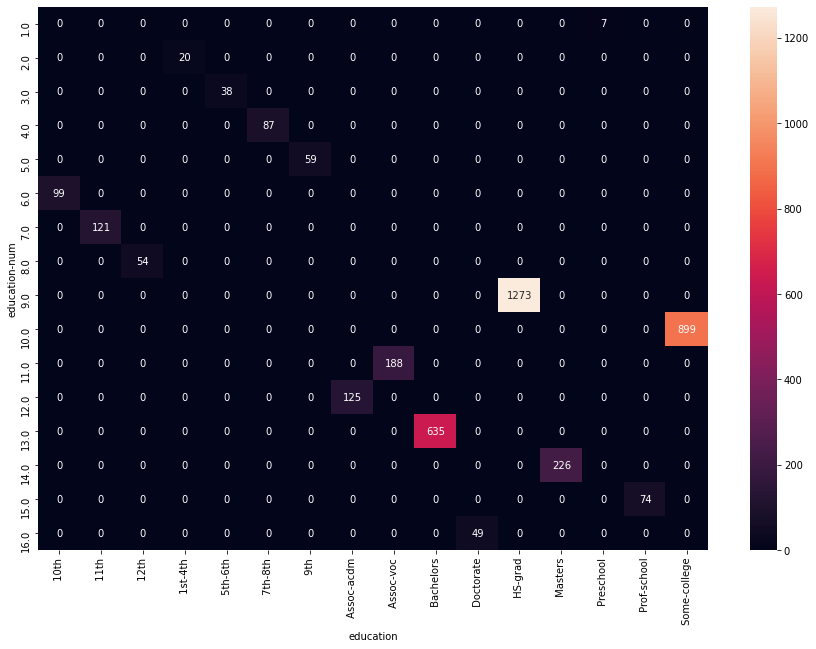

In [97]:
fig, ax = plt.subplots(figsize=(15,10))
table = pd.crosstab(index=other['education-num'],columns=other['education'])
sns.heatmap(table, annot=True, fmt='d', ax=ax)

Na základe tejto heatmpy vieme povedať, že každá hodnota z education-num je mapovaná na hodnotu v education. V každom riadku je vždy len jedno číslo, ktoré je nenulové (tak isto aj pre stĺpec).

<AxesSubplot:>

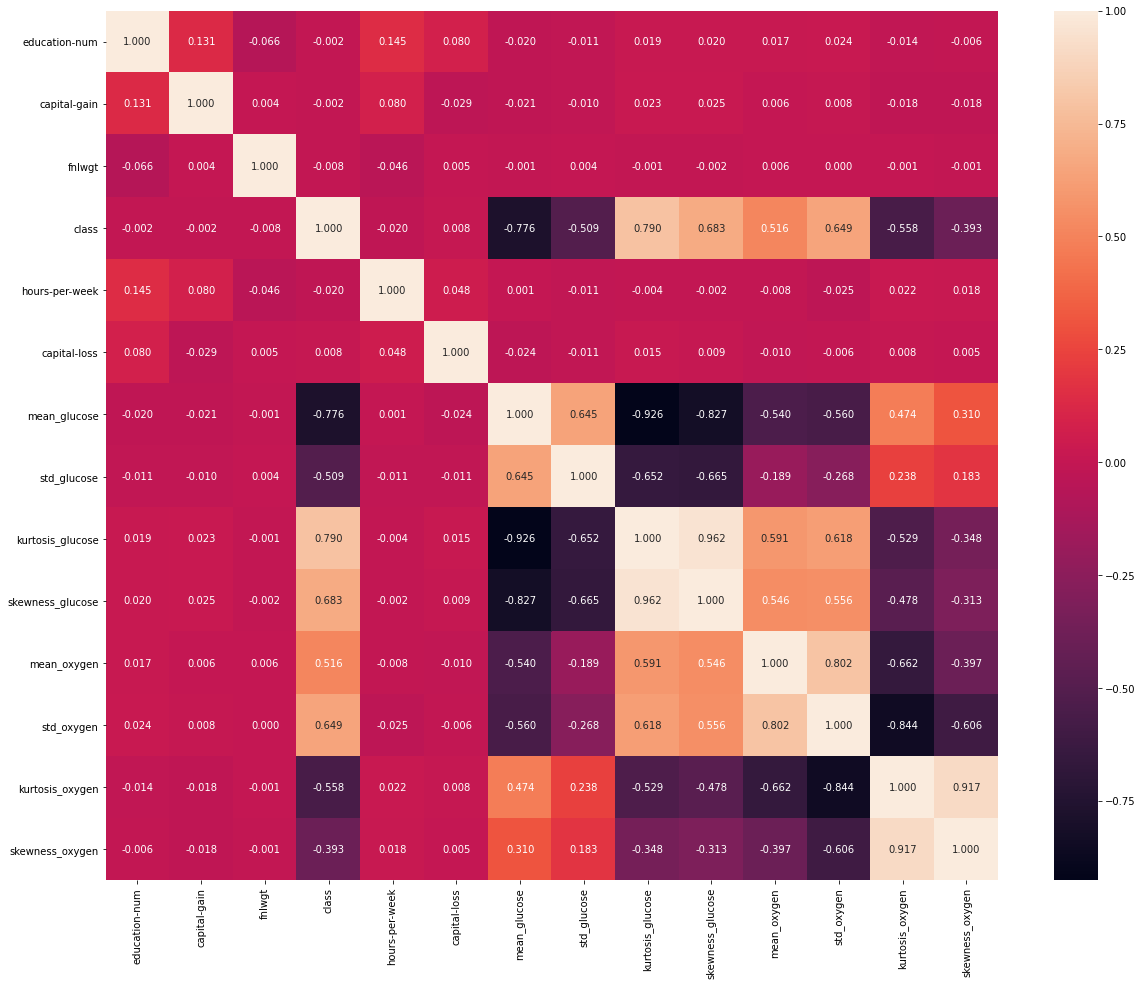

In [98]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(other.corr(), ax=ax, annot=True, fmt=".3f")

V tejto heatmape máme znázornené závislosti medzi jednotlivými číselnými atribútmi. 

Na základe toho vieme povedať:
- od education-num mierne závisí atribút capital_gain a hours_per_week (niečo nad 0,1) avšak závislosť je mierna
- pre capital_gain závislosť medzi inými atribútmi ako education-num je skoro nulová
- pre fnlwgt je závislosť medzi ostatnými atribútmi skoro nulová
- atribút class najvýraznejšie závisí od medicínskych atribútov ohľadom glukózy a kyslíka (mean, std, kurtosis, skewness)
- pre atribút hours_per_week závislosť medzi inými atribútmi ako education-num je skoro nulová
- pre capital-loss je závislosť medzi ostatnými atribútmi skoro nulová
- môžeme vidieť silnejšie závislosti medzi medicínskymi záznamami a atribútom class, ale zároveň aj medzi medicínskmi závislosťami navzájom
- medzi mean_glucose a kurtosis_glucose je skoro perfektná negatívna závislosť, aj pri skewness_glucose sa závislosť blíži k perfektnej negatívnej
- medzi kurtosis_glucose a skewness_glucose môžme vidieť skoro perfektnú kladnú závislosť azároveň medzi kusrtosis_glucose a std_oxygen je pomerne vysoká závislosť
- závislosť medzi mean_oxygen a std_oxygen je pomerne vysoká
- medzi std_oxygen a kurtosis_oxygen sa blíži k perfektnej negatívnej závislosti
- medzi kurtosis_oxygen a skewness_oxygen je skoro perfektná kladná závislosť

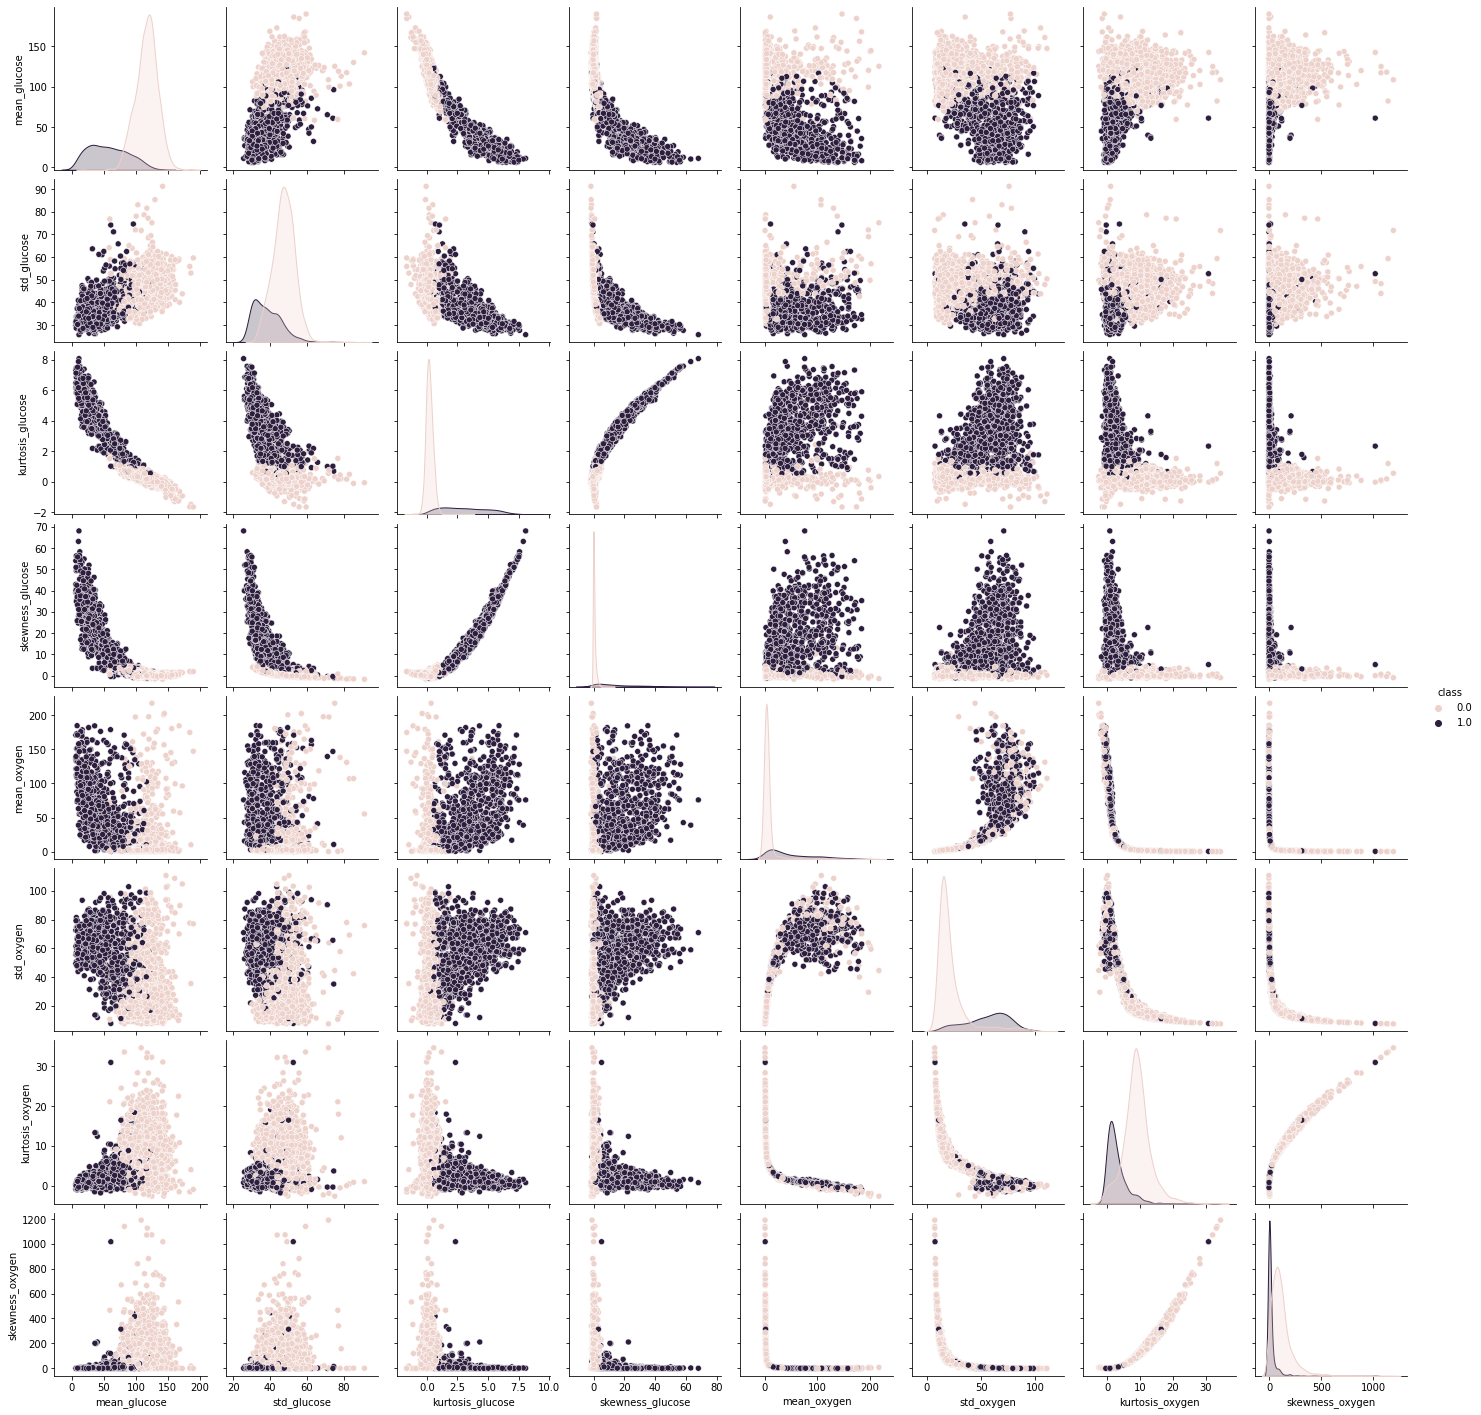

In [99]:
sns.pairplot(other, vars=['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen'], hue='class', kind='scatter')

Na základe vypočítaných korelácií sme znázornili grafy len medzi jednotlivými atribútmi medicínskych dát s tým, že sú tam zvýraznené hodnoty pre chorých a pre zdravých pacientov.

Na základe pairplotu vidíme korelácie medzi jednotlivými medicínskymi atribútmi:
- pri mean_glucose a atribútoch skewness a kurtosis glucose vidíme, že ide o negatívnu koreláciu medzi týmito atribútmi 
- medzi kurtosis_glucose a skewness_glucose vidíme skoro silnú pozitívnu koreláciu
- medzi skewness_oxygen a kurtosis_oxygen je skoro silná pozitívna závislosť

Zvyšok vieme vyčítať, či už z pairplotu, ale aj z heatmapy korelácií.

## Formulácia a štatistické overenie hypotéz o dátach

Hypotézy sme navrhli na základe zobrazenia pairplotu tak, aby sme videli čo najväčšie rozdiely medzi chorými a zdravými.

### Hypotéza 1

Výber na základe paiplotu medzi mean_glucose, kde sme videli, že hodnoty pre chorých sa združujú bližšie k osi x ako pri zdravých.

***Hypotéza nulová:*** Pacienti s cukrovkou majú v priemere rovnakú hodnotu mean_glucose ako zdraví pacienti.

***Hypotéza alternatívna:*** Pacienti s cukrovkou majú v priemere nižšiu hodnotu mean_glucose ako zdraví pacienti.

In [100]:
healthy_sample = other[other['class'] == 0.0].mean_glucose
sick_sample = other[other['class'] == 1.0].mean_glucose

Vybrali sme si zvlášť zdravých a chorých pacientov a konkrétne ich hodnoty mean_glucose.

In [101]:
def outliers(a):
    iqr = a.quantile(0.75) - a.quantile(0.25)
    lower = a.quantile(0.25) - 1.5 * iqr
    upper = a.quantile(0.75) + 1.5 * iqr
    
    return a[(a > upper) | (a < lower)]

Vytvorili sme funkciu na identifikovanie outlierov (vychýlených hodnôt) pre to aby sme vedeli rpacovať, len s hodnotami v rámci distribúcie, bez výchylok.

In [102]:
healthy_out = outliers(healthy_sample)
sick_out = outliers(sick_sample)

Zistenie outlierov pre jednotlivé skupiny zdravých a chorách pacientov.

In [103]:
healthy_sample = healthy_sample.drop(healthy_out.index)
sick_sample = sick_sample.drop(sick_out.index)

In [104]:
healthy_sample = healthy_sample.dropna()

In [105]:
healthy_sample

0       129.617188
1       100.546875
3       113.062500
4       131.132812
8       120.664062
           ...    
3978    116.906250
3979     89.531250
3980    156.531250
3981    105.562500
3982    102.867188
Name: mean_glucose, Length: 2914, dtype: float64

Odstránenie outlierov z dát chorých a zdravých pacientov. Odstránenie chýbajúcich hodnôt a výpis mean_glucose hodnôt pre zdravých pacientov.

In [106]:
sick_sample = sick_sample.dropna()

In [107]:
sick_sample

2       26.093750
5       68.171875
6       57.984375
7       39.843750
10      19.234375
          ...    
3959    80.140625
3970    32.945312
3974    22.578125
3976    79.242188
3977    26.375000
Name: mean_glucose, Length: 1014, dtype: float64

Odstránenie chýbajúcich hodnôt a výpis mean_glucose hodnôt pre chorých pacientov.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_glucose', ylabel='Density'>

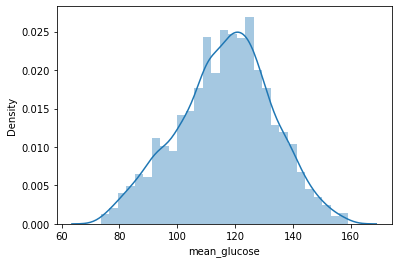

In [108]:
sns.distplot(healthy_sample)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_glucose', ylabel='Density'>

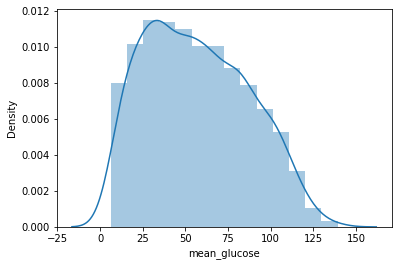

In [109]:
sns.distplot(sick_sample)

Zobrazenie distplotov aj pre zdravých aj chorých pacientov. Na základe grafu vidíme distribúciu hodnôt, ale aj ich početnosti.

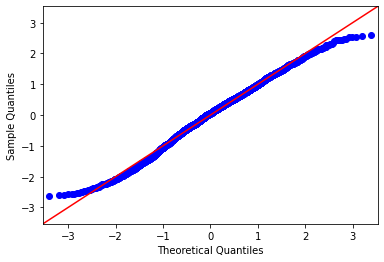

In [110]:
healthy_qq = sm.ProbPlot(healthy_sample, fit=True).qqplot(line='45')

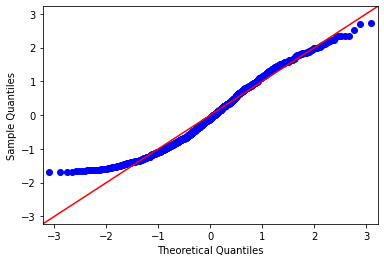

In [111]:
sick_qq = sm.ProbPlot(sick_sample, fit=True).qqplot(line='45')

Vytvorili sme QQ plot aj pre zdravých aj pre chorých pacientov. Z daných QQ plotov môžeme vidieť, že obe sú  **light tailed**.

In [112]:
shapiro_test = stats.shapiro(healthy_sample)

In [113]:
shapiro_test

ShapiroResult(statistic=0.9941112995147705, pvalue=1.923022630023752e-09)

In [114]:
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (nemohli sme odmietnúť H0)')
else:
    print('Iná distribúcia (odmietame H0)')

Iná distribúcia (odmietame H0)


Overovali sme distribúciu pre zdravých pacientov. Na základe **Shapiro-Wilk testu normálnosti** sme zamietli nulovú hypotézu o normálnosti a teda daná distribúcia je iná ako normálna distribúcia.

In [115]:
shapiro_test = stats.shapiro(sick_sample)

In [116]:
shapiro_test

ShapiroResult(statistic=0.9701589345932007, pvalue=1.4003475299912554e-13)

In [117]:
if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (nemohli sme odmietnúť H0)')
else:
    print('Iná distribúcia (odmietame H0)')

Iná distribúcia (odmietame H0)


Overovali sme distribúciu pre chorých pacientov. Na základe **Shapiro-Wilk testu normálnosti** sme zamietli nulovú hypotézu o normálnosti a teda daná distribúcia je iná ako normálna distribúcia.

Tým, že obe distribúcie sú rôzne ako normálne rozdelenie, vtedy využívame neparametrickú verziu štatistického testu. Využívame teda **Mann-Whitney U test**.

In [118]:
stat, p = stats.mannwhitneyu(healthy_sample, sick_sample) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    print('Sú rovnaké/podobné priemery (neodmietame H0)') 
else:
    print('Nie sú rovnaké/podobné priemery (odmietame H0)')

Statistics=137191.000, p=0.000
Nie sú rovnaké/podobné priemery (odmietame H0)


Na základe **Mann-Whitney U testu** sme odmietli hypotézu, že priemery mean_glucose pre zdravých a chorých pacientov sú podobné.

Je potrebné ešte overiť silu efektu na základe **Cohenovho d**, kde bolo potrebné si najskôr vytvoriť funkciu na výpočet Cohenovho d.

In [119]:
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2) 
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
    u1, u2 = np.mean(d1), np.mean(d2)
    d = (u1 - u2) / s 
    return abs(d)

In [120]:
cd = cohend(healthy_sample, sick_sample)

if 0.2 <= cd < 0.5:
    print(f'Malý efekt - Hodnota Cohen d: {cd}')
elif 0.5 <= cd < 0.8:
    print(f'Stredný efekt - Hodnota Cohen d: {cd}')
elif 0.8 <= cd:
    print(f'Veľký efekt - Hodnota Cohen d: {cd}')

Veľký efekt - Hodnota Cohen d: 2.8753972171776985


Na základe výpočtu sme zistili, že sila efektu (test) je veľká.

In [121]:
sms.DescrStatsW(healthy_sample).tconfint_mean()

(115.92398265705836, 117.10718691226216)

In [122]:
sms.DescrStatsW(sick_sample).tconfint_mean()

(54.95009672839763, 58.66457906055701)

Následne sme vypočítali intervali spoľahlivosti pre naše dáta, t.j. že hodnota priemeru sa bude nachádzať v danom intervale s väčšou pravdepodobnosťou.

<AxesSubplot:xlabel='class', ylabel='mean_glucose'>

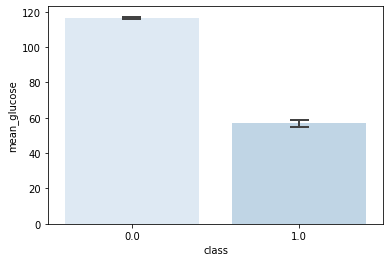

In [123]:
sns.barplot(x='class', y='mean_glucose', data=other, capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

Následne sme zobrazili aj barplot, ktorý zobrazuje intervaly spoľahlivosti. Na základe týchto grafov, ale aj intervalov spoľahlivosti môžeme povedať, že platí Alternatívna hypotéza a teda chorí pacienti majú v priemere nižšie hodnoty mean_glucose ako zdraví pacienti.

### Hypotéza 2

Výber na základe paiplotu medzi kurtosis_glucose, kde sme videli, že hodnoty pre chorých sa združujú ďalej od osi x ako pri zdravých.

**Hypotéza nulová:** Pacienti s cukrovkou majú v priemere rovnakú hodnotu kurtosis_glucose ako zdraví pacienti.

**Hypotéza alternatívna:** Pacienti s cukrovkou majú v priemere vyššiu hodnotu kurtosis_glucose ako zdraví pacienti.

In [124]:
healthy_sample = other[other['class'] == 0.0].kurtosis_glucose
sick_sample = other[other['class'] == 1.0].kurtosis_glucose

Vybrali sme si zvlášť zdravých a chorých pacientov a konkrétne ich hodnoty kurtosis_glucose.

In [125]:
healthy_out = outliers(healthy_sample)
sick_out = outliers(sick_sample)

Využili sme funkciu na zistenie outlierov (výchylok) pre jednotlivé skupiny zdravých a chorách pacientov.

In [126]:
healthy_sample = healthy_sample.drop(healthy_out.index)
sick_sample = sick_sample.drop(sick_out.index)

In [127]:
healthy_sample = healthy_sample.dropna()

In [128]:
healthy_sample

0       0.114308
1       0.519220
3       0.231768
4       0.334587
8       0.167359
          ...   
3978    0.186046
3979    0.722665
3980   -0.468718
3981    0.291259
3982    0.340797
Name: kurtosis_glucose, Length: 2886, dtype: float64

Odstránenie outlierov z dát chorých a zdravých pacientov. Odstránenie chýbajúcich hodnôt a výpis kurtosis_glucose hodnôt pre zdravých pacientov.

In [129]:
sick_sample = sick_sample.dropna()

In [130]:
sick_sample

2       5.067584
5       1.890853
6       2.855361
7       4.322010
10      5.933759
          ...   
3959    1.697879
3970    5.367896
3974    4.650770
3976    1.825052
3977    5.022365
Name: kurtosis_glucose, Length: 1014, dtype: float64

Odstránenie chýbajúcich hodnôt a výpis kurtosis_glucose hodnôt pre chorých pacientov.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_glucose', ylabel='Density'>

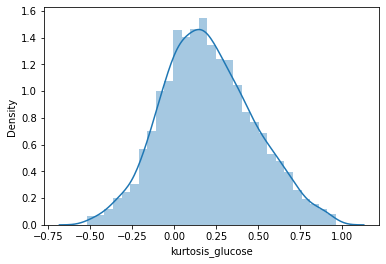

In [131]:
sns.distplot(healthy_sample)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_glucose', ylabel='Density'>

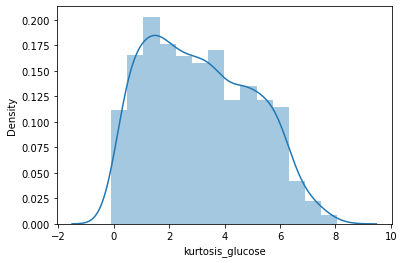

In [132]:
sns.distplot(sick_sample)

Zobrazenie distplotov aj pre zdravých aj chorých pacientov. Na základe grafu vidíme distribúciu hodnôt, ale aj ich početnosti.

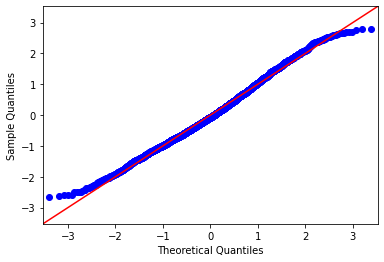

In [133]:
healthy_qq = sm.ProbPlot(healthy_sample, fit=True).qqplot(line='45')

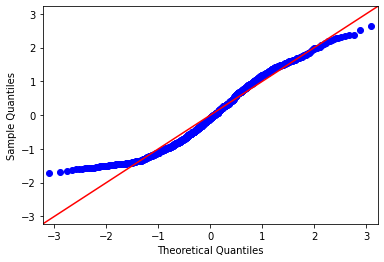

In [134]:
sick_qq = sm.ProbPlot(sick_sample, fit=True).qqplot(line='45')

Vytvorili sme QQ plot aj pre zdravých aj pre chorých pacientov. Z daných QQ plotov môžeme vidieť, že obe sú  **light tailed**.

In [135]:
shapiro_test = stats.shapiro(healthy_sample)

In [136]:
shapiro_test

ShapiroResult(statistic=0.9943288564682007, pvalue=3.981978302647349e-09)

In [137]:
if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (nemohli sme odmietnúť H0)')
else:
    print('Iná distribúcia (odmietame H0)')

Iná distribúcia (odmietame H0)


Overovali sme distribúciu pre zdravých pacientov. Na základe **Shapiro-Wilk testu normálnosti** sme zamietli nulovú hypotézu o normálnosti a teda daná distribúcia je iná ako normálna distribúcia.

In [138]:
shapiro_test = stats.shapiro(sick_sample)
print(shapiro_test)
if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (nemohli sme odmietnúť H0)')
else:
    print('Iná distribúcia (odmietame H0)')

ShapiroResult(statistic=0.9638450145721436, pvalue=3.648801519853502e-15)
Iná distribúcia (odmietame H0)


Overovali sme distribúciu pre chorých pacientov. Na základe **Shapiro-Wilk testu normálnosti** sme zamietli nulovú hypotézu o normálnosti a teda daná distribúcia je iná ako normálna distribúcia.

Tým, že obe distribúcie sú rôzne ako normálne rozdelenie, vtedy využívame neparametrickú verziu štatistického testu. Využívame teda **Mann-Whitney U test**.

In [139]:
stat, p = stats.mannwhitneyu(healthy_sample, sick_sample) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    print('Sú rovnaké/podobné priemery (neodmietame H0)') 
else:
    print('Nie sú rovnaké/podobné priemery (odmietame H0)')

Statistics=74270.000, p=0.000
Nie sú rovnaké/podobné priemery (odmietame H0)


Na základe **Mann-Whitney U testu** sme odmietli hypotézu, že priemery kurtosis_glucose pre zdravých a chorých pacientov sú podobné.

Je potrebné ešte overiť silu efektu na základe **Cohenovho d** a konkrétne nami vytvorenej funkcie.

In [140]:
cd = cohend(healthy_sample, sick_sample)
print(cd)

if 0.2 <= cd < 0.5:
    print(f'Malý efekt - Hodnota Cohen d: {cd}')
elif 0.5 <= cd < 0.8:
    print(f'Stredný efekt - Hodnota Cohen d: {cd}')
elif 0.8 <= cd:
    print(f'Veľký efekt - Hodnota Cohen d: {cd}')

2.965491912030872
Veľký efekt - Hodnota Cohen d: 2.965491912030872


Na základe výpočtu sme zistili, že sila efektu (test) je veľká.

In [141]:
sms.DescrStatsW(healthy_sample).tconfint_mean()

(0.1923881695681421, 0.21223311201882944)

In [142]:
sms.DescrStatsW(sick_sample).tconfint_mean()

(3.009699840638244, 3.2412077851507126)

Následne sme vypočítali intervali spoľahlivosti pre naše dáta.

<AxesSubplot:xlabel='class', ylabel='kurtosis_glucose'>

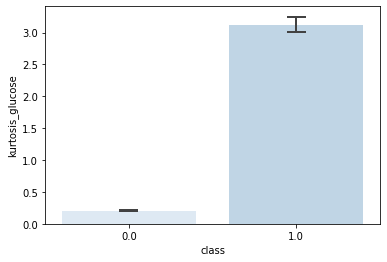

In [143]:
sns.barplot(x='class', y='kurtosis_glucose', data=other, capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

Následne sme zobrazili aj barplot, ktorý zobrazuje intervaly spoľahlivosti. Na základe týchto grafov, ale aj intervalov spoľahlivosti môžeme povedať, že platí alternatívna hypotéza a teda chorí pacienti majú v priemere vyššie hodnoty kurtosis_glucose ako zdraví pacienti.